# Tree-Based Regression Methods for 2D Linear Data
## Erin Moore

## Overview

In this project I explored the GradientBoostingRegressor, RandomforestRegressor, and DecisionTreeRegressor to fit my data.

Performed Grid Searches Performed grid searches to elucidate the optimal model hyperparameters and additional rounds to tune-in on the correct values.
Visualized Optimal Model Predictions for all three models Visualized each model’s predictions for the training data.
Computed Generalization Error(s) Computed the generalization Error for all three models.

## Imports

Imported common packages:

In [21]:
# Imports
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import numpy as np
import pandas as pd
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import os

# Where to save the figures
PROJECT_ROOT_DIR = "."
FOLDER = "figures"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, FOLDER)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

# Imported and Split Data

1. Imported the data from the file called `2DLinear.csv`.  Named the returned DataFrame `data`. 

2. Called [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with a `test_size` of 20%.  Saved the output into `X_train`, `X_test`, `y_train`, and `y_test`, respectively.  Specified the `random_state` parameter to be `42`.
3. Reshaped some data, so that I don't run into trouble later.

In [22]:
from sklearn.model_selection import train_test_split

# loading data
data = pd.read_csv('2DLinear.csv')

# extracting columns
X = data.x
y = data.y

# splitting data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Reshaped X Data and Make NumPy Arrays
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Plotted Data

Plotted the training data.

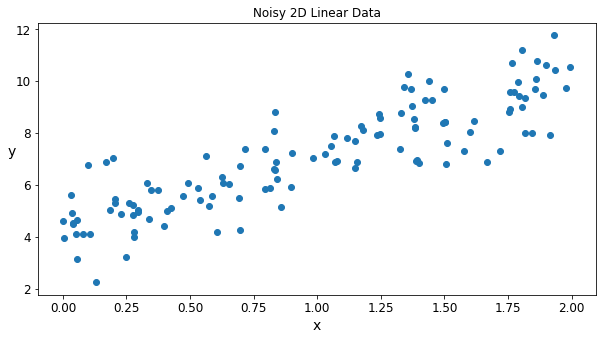

In [23]:
plt.figure(figsize=[10,5])
plt.scatter(X,y)
plt.ylabel('y', rotation = 0)
plt.xlabel('x')
plt.title('Noisy 2D Linear Data')
plt.show()

# GradientBoostingRegressor

Fitted a `GradientBoostingRegressor` model to this data. Manually assigned values to the following hyperparameters:

 - `learning_rate = <value>`
 - `max_depth = <value>`
 - `n_estimators = <value>`
 - `random_state = 42`

In [24]:
from sklearn.ensemble import GradientBoostingRegressor

# setting parameters
params = {'n_estimators': 250,
          'max_depth': 3,
          'learning_rate': 0.01,
          'random_state': 42}

# creating gradient boosting regressor
gbr = GradientBoostingRegressor(**params, random_state=42)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=250, random_state=42)

### Plotted Model Predictions for Training Set

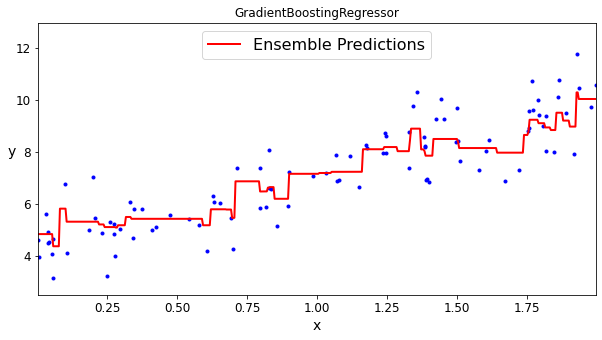

In [25]:
plt.figure(figsize=[10,5])
plt.ylabel('y', rotation = 0)
plt.xlabel('x')
plt.title('GradientBoostingRegressor')
plot_predictions([gbr], X_train, y_train, [X_train.min(), X_train.max(), .8*y_train.min(), 1.1*y_train.max()],label='Ensemble Predictions')

# RandomForestRegressor

Fitted a `RandomForestRegressor` model to this data. Manually assigned values to the following hyperparameters:

 - `min_samples_split = <value>`
 - `max_depth = <value>`
 - `n_estimators = <value>`
 - `random_state = 42`

In [26]:
from sklearn.ensemble import RandomForestRegressor

# setting up parameters
params = {'n_estimators': 900,
          'max_depth': 3,
          'min_samples_split': 30,
          'random_state': 42}

# creating and fitting random forest regressor
rfr = RandomForestRegressor(**params, random_state=42)
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, min_samples_split=30, n_estimators=900,
                      random_state=42)

### Plotted Model Predictions for Training Set

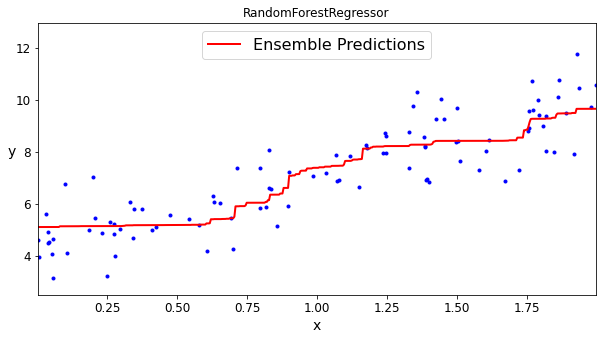

In [27]:
plt.figure(figsize=[10,5])
plt.ylabel('y', rotation = 0)
plt.xlabel('x')
plt.title('RandomForestRegressor')
plot_predictions([rfr], X_train, y_train, [X_train.min(), X_train.max(), .8*y_train.min(), 1.1*y_train.max()],label='Ensemble Predictions')

# DecisionTreeRegressor

Fitted a `DecisionTreeRegressor` model to this data. Manually assigned values to the following hyperparameters:

 - `splitter = <value>`
 - `max_depth = <value>`
 - `min_samples_split = <value>`
 - `random_state = 42`

In [28]:
from sklearn.tree import DecisionTreeRegressor

# setting up parameters
params = {'splitter': 'best',
          'max_depth': 3,
          'min_samples_split': 10,
          'random_state': 42}

# creating and fitting decision tree regressor
dtr = DecisionTreeRegressor(**params, random_state=42)
dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3, min_samples_split=10, random_state=42)

### Plotted Model Predictions for Training Set

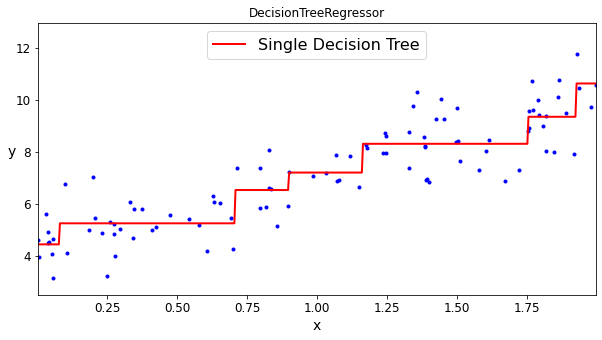

In [29]:
plt.figure(figsize=[10,5])
plt.ylabel('y', rotation = 0)
plt.xlabel('x')
plt.title('DecisionTreeRegressor')
plot_predictions([dtr], X_train, y_train, [X_train.min(), X_train.max(), .8*y_train.min(), 1.1*y_train.max()],label='Single Decision Tree')

# Performed Grid Searches

Performed a series of grid searches, which yielded the optimal hyperparamter values for each of the three model types. 
Performed a course-grained grid search, with a very broad range of values first.  Then, performed a second grid search using a tighter range of values centered on those identified in the first grid search.

   GradientBoostingRegressor:
    
     - `max_depth = <value>`
     - `n_estimators = <value>`
     - `learning_rate = <value>`

   RandomForestRegressor:
    
     - `max_depth = <value>`
     - `n_estimators = <value>`
     - `min_samples_split = <value>`

   DecisionTreeRegressor:
    
     - `splitter = <value>`
     - `max_depth = <value>`
     - `min_samples_split = <value>`

## Performed Individual Model Grid Searches

Performed a series of grid searches to compute the optimal hyperparameter values for each of the three model types.

In [64]:
# Coarse-Grained GradientBoostingRegressor GridSearch
from sklearn.model_selection import GridSearchCV

# setting up coarse search grid
param_grid = {'max_depth':  [*range(1,27,5)], 'n_estimators': [*range(1,2001,200)], 'learning_rate': [.01*x for x in range(1,16,2)]}

# performing search for rough parameters
grid_search_cv = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid = param_grid, cv=3)
grid_search_cv = grid_search_cv.fit(X_train, y_train)

print("The initial best parameters are: ", grid_search_cv.best_params_)

The initial best parameters are:  {'learning_rate': 0.11, 'max_depth': 1, 'n_estimators': 1401}


In [65]:
# Refined GradientBoostingRegressor GridSearch

# setting up refined grid based on above results
param_grid = {'max_depth':  [*range(1,6,1)], 'n_estimators': [*range(1200,1650,50)], 'learning_rate': [.005*x for x in range(18,25,1)]}

# performing search
grid_search_cv = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid = param_grid, cv=3)
grid_search_cv = grid_search_cv.fit(X_train, y_train)

print("The refined best parameters are: ", grid_search_cv.best_params_)

The refined best parameters are:  {'learning_rate': 0.11, 'max_depth': 1, 'n_estimators': 1250}


In [66]:
# Final GradientBoostingRegressor GridSearch

# setting up final grid based on the refined results
param_grid = {'max_depth':  [*range(1,4,1)], 'n_estimators': [*range(1200,1310,10)], 'learning_rate': [.001*x for x in range(105,116,1)]}

# performing final grid search for optimal parameters
grid_search_cv = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid = param_grid, cv=3)
grid_search_cv = grid_search_cv.fit(X_train, y_train)

print("The final best parameters are: ", grid_search_cv.best_params_)
optimal_params_gbr = grid_search_cv.best_params_

The final best parameters are:  {'learning_rate': 0.11, 'max_depth': 1, 'n_estimators': 1250}


On this dataset, the optimal model parameters for the `GradientBoostingRegressor` class are:

- `learning_rate = .11`
- `max_depth = 1`
- `n_estimators = 1250`

In [33]:
# Coarse-Grained RandomForestRegressor GridSearch

# setting up coarse search grid
param_grid = {'max_depth':  [*range(1,51,10)], 'n_estimators': [*range(1,1001,100)], 'min_samples_split': [*range(2,52,10)]}

# performing search
grid_search_cv = GridSearchCV(RandomForestRegressor(random_state=42), param_grid = param_grid, cv=3)
grid_search_cv = grid_search_cv.fit(X_train, y_train)

print("The initial best parameters are: ", grid_search_cv.best_params_)

The initial best parameters are:  {'max_depth': 11, 'min_samples_split': 12, 'n_estimators': 901}


In [39]:
# Refined RandomForestRegressor GridSearch

# setting up refined grid based on above results
param_grid = {'max_depth':  [*range(1,21,5)], 'n_estimators': [*range(800,1050,50)], 'min_samples_split': [*range(2,22,4)]}

# performing search
grid_search_cv = GridSearchCV(RandomForestRegressor(random_state=42), param_grid = param_grid, cv=3)
grid_search_cv = grid_search_cv.fit(X_train, y_train)

print("The refined best parameters are: ", grid_search_cv.best_params_)

The refined best parameters are:  {'max_depth': 11, 'min_samples_split': 10, 'n_estimators': 900}


In [41]:
# Final RandomForestRegressor GridSearch

# setting up final grid based on refined results
param_grid = {'max_depth':  [*range(8,14,1)], 'n_estimators': [*range(850,960,10)], 'min_samples_split': [*range(8,14,1)]}

# performing final search for optimal parameters
grid_search_cv = GridSearchCV(RandomForestRegressor(random_state=42), param_grid = param_grid, cv=3)
grid_search_cv = grid_search_cv.fit(X_train, y_train)

print("The final best parameters are: ", grid_search_cv.best_params_)
optimal_params_rfr = grid_search_cv.best_params_

The final best parameters are:  {'max_depth': 8, 'min_samples_split': 8, 'n_estimators': 900}


On this dataset, the optimal model parameters for the `RandomForestRegressor` class are:

- `max_depth = 8`
- `n_estimators = 900`
- `min_samples_split = 8`

In [42]:
# Coarse-Grained DecisionTreeRegressor GridSearch

# setting up coarse grid
param_grid = {'max_depth':  [*range(1,51,10)], 'splitter': ['best','random'], 'min_samples_split': [*range(2,52,10)]}

# performing search
grid_search_cv = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid = param_grid, cv=3)
grid_search_cv = grid_search_cv.fit(X_train, y_train)

print("The initial best parameters are: ", grid_search_cv.best_params_)

The initial best parameters are:  {'max_depth': 11, 'min_samples_split': 22, 'splitter': 'best'}


In [52]:
# Refined DecisionTreeRegressor GridSearch

# setting up refined grid based on above results
param_grid = {'max_depth':  [*range(1,21,1)], 'splitter': ['best','random'], 'min_samples_split': [*range(2,33,1)]}

# performing search
grid_search_cv = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid = param_grid, cv=3)
grid_search_cv = grid_search_cv.fit(X_train, y_train)

print("The refined/final best parameters are: ", grid_search_cv.best_params_)
optimal_params_dtr = grid_search_cv.best_params_

The refined/final best parameters are:  {'max_depth': 6, 'min_samples_split': 4, 'splitter': 'random'}


On this dataset, the optimal model parameters for the `RandomForestRegressor` class are:

- `splitter = random`
- `max_depth = 6`
- `min_samples_split = 4`

# Visualized Optimal Model Predictions

Used the `best_params_` attribute of the grid search objects from above to create the three optimal models below. Visualized the models predictions on the training set.  

### Created Optimal GradientBoostingRegressor Model

In [67]:
# setting up gradient boosting regressor with optimal parameters and fitting to training data
opt_gbr = GradientBoostingRegressor(**optimal_params_gbr, random_state=42)
opt_gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.11, max_depth=1, n_estimators=1250,
                          random_state=42)

### Plotted Model Predictions for Training Set

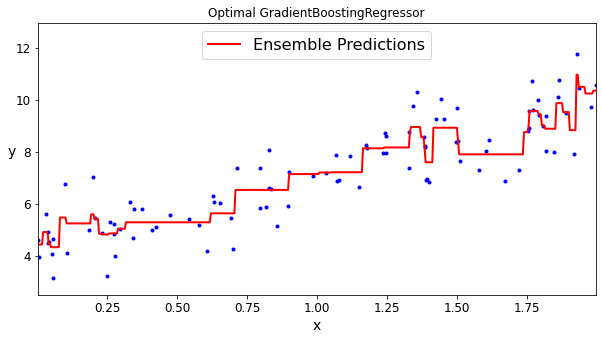

In [68]:
# plotting optimal predictions on the training data
plt.figure(figsize=[10,5])
plt.ylabel('y', rotation = 0)
plt.xlabel('x')
plt.title('Optimal GradientBoostingRegressor')
plot_predictions([opt_gbr], X_train, y_train, [X_train.min(), X_train.max(), .8*y_train.min(), 1.1*y_train.max()],label='Ensemble Predictions')

### Created Optimal RandomForestRegressor Model

In [48]:
# setting up random forest regressor with optimal parameters and fitting to training data
opt_rfr = RandomForestRegressor(**optimal_params_rfr, random_state=42)
opt_rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, min_samples_split=8, n_estimators=900,
                      random_state=42)

### Plotted Model Predictions for Training Set

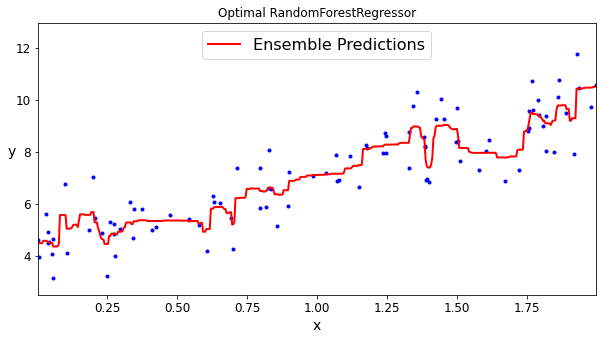

In [49]:
# plotting optimal predictions on training data
plt.figure(figsize=[10,5])
plt.ylabel('y', rotation = 0)
plt.xlabel('x')
plt.title('Optimal RandomForestRegressor')
plot_predictions([opt_rfr], X_train, y_train, [X_train.min(), X_train.max(), .8*y_train.min(), 1.1*y_train.max()],label='Ensemble Predictions')

### Created Optimal DecisionTreeRegressor Model

In [61]:
# setting up optimal decision tree regressor and fitting to training data
opt_dtr = DecisionTreeRegressor(**optimal_params_dtr, random_state=42)
opt_dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=6, min_samples_split=4, random_state=42,
                      splitter='random')

### Plotted Model Predictions for Training Set

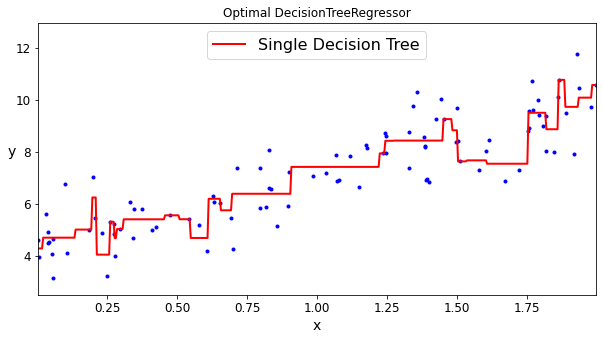

In [54]:
# plotting optimal predictions on training data
plt.figure(figsize=[10,5])
plt.ylabel('y', rotation = 0)
plt.xlabel('x')
plt.title('Optimal DecisionTreeRegressor')
plot_predictions([opt_dtr], X_train, y_train, [X_train.min(), X_train.max(), .8*y_train.min(), 1.1*y_train.max()],label='Single Decision Tree')

# Computed Generalization Error

Computed the generalization error for each of the optimal models computed above.  Used MSE as the generalization error metric.

In [69]:
from sklearn.metrics import mean_squared_error as mse

# predicting on test data with optimal models
pred_gbr_test = opt_gbr.predict(X_test)
pred_rfr_test = opt_rfr.predict(X_test)
pred_dtr_test = opt_dtr.predict(X_test)

# calculating error for optimal models
mse_gbr_test = mse(y_test, pred_gbr_test)
mse_rfr_test = mse(y_test, pred_rfr_test)
mse_dtr_test = mse(y_test, pred_dtr_test)

# displaying error
print("MSE for optimal GradientBoostingRegressor: ", mse_gbr_test)
print("MSE for optimal RandomForestRegressor: ", mse_rfr_test)
print("MSE for optimal DecisionTreeRegressor: ", mse_dtr_test)

MSE for optimal GradientBoostingRegressor:  1.3195803031889384
MSE for optimal RandomForestRegressor:  1.2738765324909245
MSE for optimal DecisionTreeRegressor:  1.317196204975061


# Critical Analysis

Think critically about the different algorithms, as well as their prediction results, and characterize the trends you observe in the prediction results. Can you explain in your own words how the algorithms work? How do the results predicted by these models compare and contrast?  Can you see any relationship between the algorithms and the model results? Can you see any relationship between the prediction curves and the generalization error?

I am looking for meaningful content here.  Do not copy-and-paste model definitions off of the Internet.  You should think and write critically.


1. The GradientBoostingRegressor works by combining the predictive power of many machine learning models in an ensemble approach to more accurately predict future data and, in sklearn, the underlying models are decision tree regressors. In gradient boosting, each successive model is tuned to better predict where the previous one(s) failed. It does this by fitting the next regression tree to the negative gradient of the loss function of the previous ensemble. This means each successive tree is trained to minimize the loss function of the next ensemble when it is incorporated. In plain language, this means that each new model is specifically trained to best fit the data points that the previous ensemble predicted the worst.
    The RandomForestRegressor works similarly to the GradientBoostingRegressor, except it does not optimize each successive model. Instead, some number of models are created independently and their results are amalgamated at the end.
    The DecisionTreeRegressor works by continuously splitting the input data into subsets. It then analyzes each subset to find which subset best explains the target values and picks that subset (called a node in a tree). The regressor continues splitting the chosen subsets until certain hyperparameters are met, such as maximum depth where the depth is how many times a subset is split and analyzed. 
2. The RandomForestRegressor performs the best, followed by the DecisionTreeRegressor, and then the GradientBoostingRegressor. 
3. We expect the GradientBoostingRegressor to perform the best because each successive model is tuned specifically to optimize the next result, whereas the RandomForestRegressor creates many independent models and the DecisionTreeRegressor is just one model. Surprisingly, the RandomForestRegressor outperforms the GradientBoostingRegressor, which also barely underperforms versus the DecisionTreeRegressor. This may be because our grid search optimized the GradientBoostingRegressor to have 1250 successive models but only at a depth of 1, so they may have overfit. 
4. For the RandomForestRegressor plot, we see many more minute adjustments in the regression line, whereas the GradientBoostingRegressor and the DecisionTreeRegressor produced much blockier curves. This means that the RandomForestRegressor better fit the data and was more sensitive to small deviations in the data. I suspect that this is a result of the larger optimal depth of the RandomForestRegressor (8) compared to that of the GradientBoostingRegressor (1) or the DecisionTreeRegressor (6). I also suspect that if we were to force the GradientBoostingRegressor to have a larger maximum depth that it would perform slightly better. 

# Final Model Selection and Justification

Based on the arguments outlined in your critical analysis, make one final model recommendation.  Which model best characterizes this data?  In other words, which of these models is going to generalize better? Consider all factors.  What is the type of the optimal model (i.e. `GradientBoostingRegressor`, `RandomForestRegressor`, or `DecisionTreeRegressor`)? What are the optimal model hyperparameters that should be used for training on this data set?    Succinctly summarize the justification for your choice based on your arguments made above in the critical analysis section.


Based on the available evidence, I would recommend the RandomForestRegressor with hyperparameters of: max_depth = 8, n_estimators = 900, min_samples_split = 8. I would also recommend that further investigation be done as to why the GradientBoostingRegressor did not perform the best, since in theory it should. Perhaps the type of data we are investiging contributed to this surprising result. 